# PAP2 V253: Apsorption von $\alpha$-, $\beta$- & $\gamma$-Strahlen

Absorption Versuchsauswertung

Aufgabe 1: Absorption von $\beta$-Strahlung

[  30.   30.   30.   30.   30.   30.  120.  120.  120.  120.  120.  120.
  120.  120.  120.  120.  120.  120.  120.  300.]
[ 0.   0.3  0.6  0.9  1.2  1.5  1.8  2.1  2.4  2.7  3.   3.3  3.6  3.9  4.2
  4.5  4.8  5.1  5.4  6.4]
[ 1102.   700.   453.   354.   210.   124.   287.   175.   125.    86.
    54.    70.    51.    74.    69.    78.    76.    65.    77.   145.]


<Container object of 3 artists>

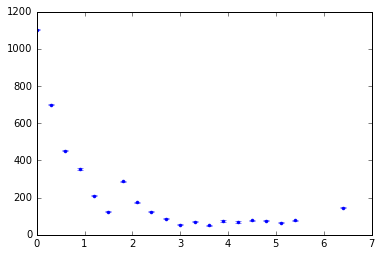

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

t, d, z = np.loadtxt('tab1.txt', skiprows=1, unpack=True)

print t
print d
print z

plt.errorbar(d, z, 3, fmt=".", label='Messwerte mit Fehler $\\sqrt{N}$')


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

U_ein, ein_err, U_aus1, aus1_err, U_aus2, aus2_err = np.loadtxt('tab1.txt', skiprows=1, usecols=(0,1,2,3,4,5), unpack=True)



#Zaehlrohrspannung:
U=np.array([410,435,460,485,510,535,560])
#gezaehlte Ereignisse
N=np.array([2494,2512,2540,2551,2535,2532,2591])
Fehler_N=np.sqrt(N)

#Fitten
from scipy.optimize import curve_fit
def linear(x,a,b):
    return a*x+b
popt, pcov=curve_fit(linear, U, N)
perr = np.sqrt(np.diag(pcov))

#Plotten
plt.errorbar(U, N, Fehler_N, fmt=".", label='Messwerte mit Fehler $\\sqrt{N}$')
plt.xlabel('$Spannung\ U_{Zaehlrohr}\  [V]$')
plt.ylabel('$Ereignisse$')
plt.title('Diagramm 1: Zaehlrohrcharakteristik')
plt.plot(U, linear(U,*popt), label='$Steigung: \; m_{fit}=%.2f \pm%.2f $' %(popt[0], perr[0]))
plt.rcParams["figure.figsize"][0] = 10
plt.rcParams["figure.figsize"][1] = 7
plt.rcParams["font.family"]='serif'
plt.axis((400, 570, 2300, 2650))
plt.legend(title='Messwerte und Linearer Fit', loc='best', borderpad=1, borderaxespad=1, shadow='true', fontsize='medium')
plt.grid(True)
#plt.savefig('v253_1.pdf', format='pdf')



data = np.loadtxt('1.txt', skiprows=1)

x = unp.uarray(data[:,0]*const.milli, 0.05*const.milli)
N = data[:,2]
n = unp.uarray(N, np.sqrt(N))/data[:,1]
nUb = unc.ufloat(149,np.sqrt(149))/(5.*60.)

n = n-nUb

table = pt.PrettyTable()
table.add_column('x [mm]', x/const.milli, align='r')
table.add_column('(n-n_U^b) [1/s]', n, align='r')
with open('Resources/3.1.txt', 'w') as file:
    file.write(table.get_string())

# Abschätzung der Maximalreichweite aus dem Diagramm
x1 = 3.3*const.milli
x2 = 3.8*const.milli
xM = unc.ufloat(x1+np.abs(x1-x2)/2., np.abs(x1-x2)/2.)

# Berechnung der Maximalenergie
RbES = 0.13*const.gram/const.centi**2
rAl = 2.7*const.gram/const.centi**3
Rb = RbES + xM * rAl
print "Flächendichte:", papstats.pformat(Rb/(const.gram/const.centi**2), label='R^b', unit='g/cm^2', format='.2u')
print "Maximalenergie:"
EM = unc.ufloat(2.25,0.1) # Aus Diagramm in Versuchsanleitung abgelesen
papstats.print_rdiff(EM,unc.ufloat(2.274,0))

# Plot
plt.clf()
plt.title(u'Diagramm 3.1: '+r'$\beta$'+u'-Strahlung in Abhängigkeit der Absorberdicke mit Extrapolation')
plt.yscale('log', nonposy='clip')
plt.xlabel('Absorberdicke $x \, [mm]$')
plt.ylabel(u'korrigierte Zählrate '+r'$(n-n_U^{\beta}) \, [\frac{Ereignisse}{s}]$')
papstats.plot_data(x/const.milli, n, label='Messpunkte')
sl_upper = 10
sl = (n > 0) & (n <= sl_upper)
k = 5
xspace = np.linspace(x[sl][0].n, 0.004, num=1000)
extrapolater = ip.UnivariateSpline(unp.nominal_values(x[sl]), np.log(unp.nominal_values(n[sl])), k=k)
plt.plot(xspace/const.milli, np.exp(extrapolater(xspace)), color='r', label='Extrapolation mit Polynom der Ordnung $k='+str(k)+'$ mit $n \in (0,'+str(sl_upper)+']$')
plt.fill_betweenx(np.linspace(1e-3,1e2), x1/const.milli, x2/const.milli, color='g', alpha=0.2)
plt.xlim(0, xspace[-1]/const.milli)
plt.ylim(1e-3,1e2)
handles, labels = plt.gca().get_legend_handles_labels()
p = plt.Rectangle((0, 0), 1, 1, color='g', alpha=0.2)
handles.append(p)
labels.append(u'Abschätzung der Maximalreichweite:\n$'+papstats.pformat(xM/const.milli, label='x_M', unit='mm')+'$')
plt.legend(handles, labels, loc='lower left')
papstats.savefig_a4('3.1.png')



IndexError: list index out of range

Aufgabe 2: 

Aufgabe 3: 

Aufgabe 4: 